In [44]:
import torch
import os
import numpy as np

from numpy import array
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim
from keras.models import Sequential
import matplotlib. pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from time import mktime as mktime
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout,Reshape ,LSTM
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
#from sklearn.metrics import Accuracy



In [45]:
data = pd.read_csv(r'C:\Users\SAMSUNG\OneDrive\Desktop\us cpi.csv')
datas=pd.read_csv(r'C:\Users\SAMSUNG\OneDrive\Desktop\ethiopia.csv')


In [46]:
data.head()


,period,CPI
0,1955-01-01,12.244589
1,1955-02-01,12.244589
2,1955-03-01,12.244589
3,1955-04-01,12.244589
4,1955-05-01,12.244589


In [47]:
datas.head()

,date,CPI
0,12/1/2000,15.568041
1,1/1/2001,16.043089
2,2/1/2001,15.974036
3,3/1/2001,15.637517
4,4/1/2001,15.452784


In [48]:
import datetime
def str_date(s):
    split=s.split('-')
    year,month,day=int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
datetime_object=str_date('1955-01-01')
datetime_object

datetime.datetime(1955, 1, 1, 0, 0)

In [49]:
data['period']=data['period'].apply(str_date)

In [50]:
data.index=data.pop('period')

In [52]:
import datetime
def str_date(sr):
    split=sr.split('/')
    year,month,day=int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
datetime_object=str_date('2001/01/01')
datetime_object

datetime.datetime(2001, 1, 1, 0, 0)

In [53]:
datas['date']=datas['date'].apply(str_date)

ValueError: day is out of range for month

In [54]:
datas.head()

,date,CPI
0,12/1/2000,15.568041
1,1/1/2001,16.043089
2,2/1/2001,15.974036
3,3/1/2001,15.637517
4,4/1/2001,15.452784


In [55]:
datas.index=datas.pop('date')

In [56]:
data.index=data.pop('period')

KeyError: 'period'

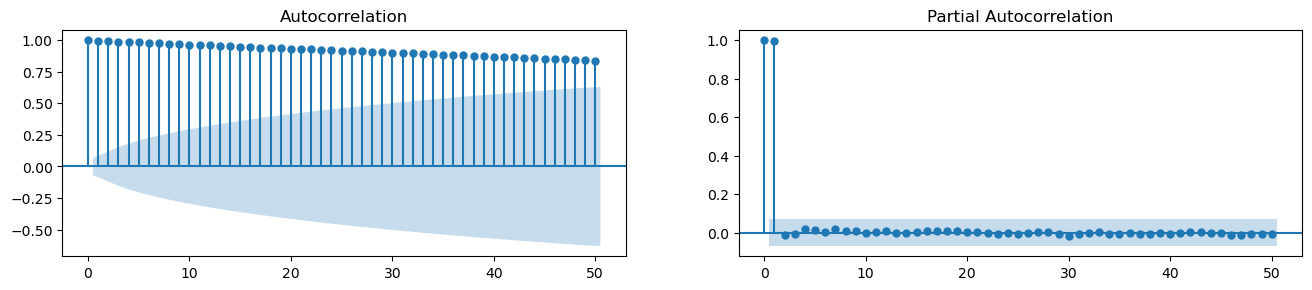

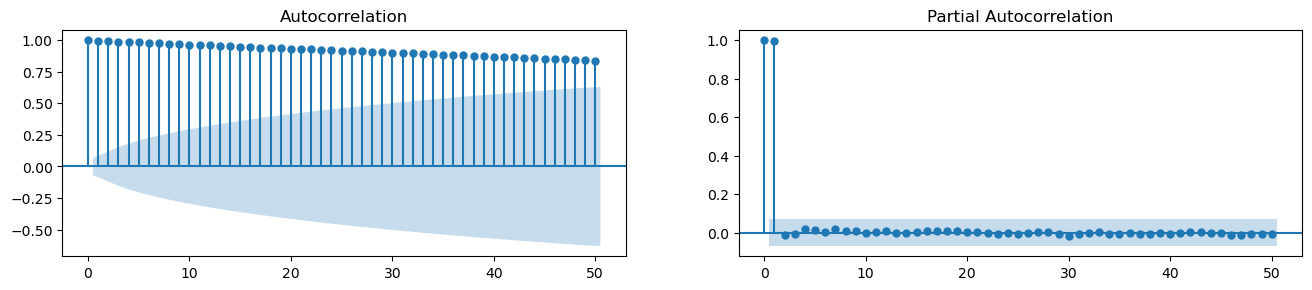

In [57]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data['CPI'].tolist(), lags=50, ax=axes[0])
plot_pacf(data['CPI'].tolist(), lags=50, ax=axes[1])

In [10]:
def create_sequences(sequence, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


In [11]:
split_idx = pd.to_datetime('1955-01-01') 
                                               
end_training_ix = pd.to_datetime('2019-01-01')    

data_train = data [ : end_training_ix]

data_test =  data [end_training_ix : ]

In [12]:
X1, y1 = create_sequences(data. values, seq_length=1)
train_split=0.8
date_index =data. index
split_idx = int(np. ceil(len(X1)*train_split) )
X_train, X_test = X1[ : split_idx], X1[split_idx: ]

y_train, y_test = y1[ : split_idx], y1[split_idx: ]
X_train_date, X_test_date = date_index[ : split_idx], date_index[split_idx:]
print (X1. shape, X_train. shape, X_test. shape, y_test. shape)


(811, 1, 1) (649, 1, 1) (162, 1, 1) (162, 1)


In [13]:
from keras.layers import Dense #dense layers
from keras.layers import LSTM

In [14]:
lstm=Sequential()
lstm.add(LSTM(50,input_shape=(X_train.shape[1],X_train.shape[2]),activation='relu',return_sequences=True))
lstm.add(Dense(1))

lstm.compile(loss='mean_squared_error',optimizer='adam',metrics=['Accuracy'])
lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10400     
                                                                 
 dense (Dense)               (None, 1, 1)              51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [15]:
history=lstm.fit(X_train, y_train, epochs=100, verbose=1)


Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 2880.9758 - Accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 2569.0837 - Accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 2166.6660 - Accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 1632.9573 - Accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 1044.9434 - Accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 443.5288 - Accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 166.2629 - Accuracy: 0.0000e+00
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 51.4639 - Accuracy: 0.0000e+00
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 10.1188 - Accuracy: 0.0000e+00
Epoch 10/100
21/21 [==============================] 

In [16]:
yd=lstm.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [17]:
yd.shape

(162, 1, 1)

In [18]:
y_test.shape

(162, 1)

In [19]:
X_test=X_test .reshape(162,1)

In [20]:
yd=yd.reshape(162,1)

In [21]:
rmse=mean_squared_error(y_test,yd,squared=False)
mape=mean_absolute_percentage_error(y_test,yd)
mae=mean_squared_error(y_test,yd)
print("RSME: " ,rmse)
print("MAPE: ", mape)
print("MAE: ", mae)


RSME:  0.5174238400923146
MAPE:  0.003260209275146703
MAE:  0.26772743029587714


In [22]:
x_input = array(data.values)
#_put = x_input.reshape((1,1))
#hat = lstm.predict(x_input)
#rint(yhat)

In [23]:
x_input.shape

(812, 1)

In [24]:
x_input.reshape(812,1)

array([[ 12.24458911],
       [ 12.24458911],
       [ 12.24458911],
       [ 12.24458911],
       [ 12.24458911],
       [ 12.24458911],
       [ 12.29044899],
       [ 12.29044899],
       [ 12.33630888],
       [ 12.33630888],
       [ 12.33630888],
       [ 12.29044899],
       [ 12.29044899],
       [ 12.29044899],
       [ 12.29044899],
       [ 12.33630888],
       [ 12.38216876],
       [ 12.47388853],
       [ 12.5656083 ],
       [ 12.51974841],
       [ 12.5656083 ],
       [ 12.61146818],
       [ 12.61146818],
       [ 12.65732807],
       [ 12.65732807],
       [ 12.70318795],
       [ 12.74904783],
       [ 12.79490772],
       [ 12.8407676 ],
       [ 12.88662749],
       [ 12.97834726],
       [ 12.97834726],
       [ 12.97834726],
       [ 12.97834726],
       [ 13.02420714],
       [ 13.02420714],
       [ 13.11592691],
       [ 13.11592691],
       [ 13.20764668],
       [ 13.25350656],
       [ 13.25350656],
       [ 13.25350656],
       [ 13.29936645],
       [ 13

In [25]:

yhat = lstm.predict(x_input)
print(yhat)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/lstm/transpose' defined at (most recent call last):
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\SAMSUNG\AppData\Local\Temp/ipykernel_18764/3859533194.py", line 1, in <module>
      yhat = lstm.predict(x_input)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\layers\rnn\base_rnn.py", line 515, in __call__
      return super(RNN, self).__call__(inputs, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\layers\rnn\lstm.py", line 574, in call
      last_output, outputs, states = backend.rnn(
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\backend.py", line 4476, in rnn
      inputs = tf.nest.map_structure(swap_batch_timestep, inputs)
    File "C:\Users\SAMSUNG\anaconda3\anacoda\lib\site-packages\keras\backend.py", line 4473, in swap_batch_timestep
      return tf.compat.v1.transpose(input_t, axes)
Node: 'sequential/lstm/transpose'
transpose expects a vector of size 2. But input(1) is a vector of size 3
	 [[{{node sequential/lstm/transpose}}]] [Op:__inference_predict_function_11291]

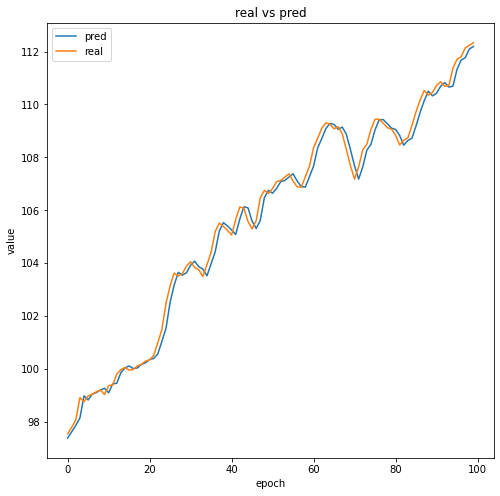

In [26]:
fig_acc = plt.figure(figsize=(8, 8))
plt.plot(yd[:100])
plt.plot(y_test[:100])
plt.title('real vs pred')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['pred', 'real'], loc='upper left')
plt.show()

In [55]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import TimeDistributed
 

In [56]:
X1, y1 = create_sequences(data. values, seq_length=1)
train_split=0.8
date_index =data. index
split_idx = int(np. ceil(len(X1)*train_split) )
X_train, X_test = X1[ : split_idx], X1[split_idx: ]

y_train, y_test = y1[ : split_idx], y1[split_idx: ]
X_train_date, X_test_date = date_index[ : split_idx], date_index[split_idx:]
print (X1. shape, X_train. shape, X_test. shape, y_test. shape)

(811, 1, 1) (649, 1, 1) (162, 1, 1) (162, 1)


In [57]:
CNN= Sequential()
CNN.add(Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
CNN.add(MaxPooling1D(pool_size=1))
CNN.add(Flatten())
CNN.add(Dense(50, activation='relu'))
CNN.add(Dense(1))
CNN.compile(optimizer='adam', loss='mse')

In [58]:
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             64        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                1650      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,765
Trainable params: 1,765
Non-trainable params: 0
____________________________________________________

In [59]:

plot_model(CNN, to_file='CNN_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'plot_model' is not defined

In [61]:
X_train=X_train.reshape(649,1)

In [62]:
CNN.fit(X_train, y_train, epochs=100, verbose=0)


In [69]:
yhat = CNN.predict(X_test)


6/6 [==============================] - 0s 2ms/step


In [72]:
rmse=mean_squared_error(y_test,yhat,squared=False)
mape=mean_absolute_percentage_error(y_test,yhat)
mae=mean_squared_error(y_test,yhat)
print("RSME: " ,rmse)
print("MAPE: ", mape)
print("MAE: ", mae)

RSME:  0.419415707576113
MAPE:  0.0029415565842471104
MAE:  0.17590953576157153


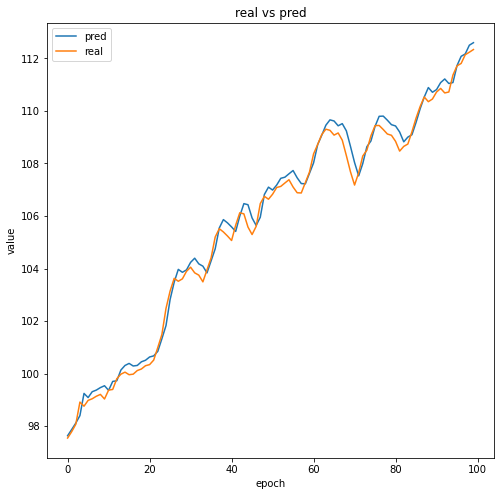

In [75]:
fig_acc = plt.figure(figsize=(8, 8))
plt.plot(yhat[:100])
plt.plot(y_test[:100])
plt.title('real vs pred')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['pred', 'real'], loc='upper left')
plt.show()

In [76]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

In [59]:
X1, y1 = create_sequences(data. values, seq_length=1)
train_split=0.8
date_index =data. index
split_idx = int(np. ceil(len(X1)*train_split) )
X_train, X_test = X1[ : split_idx], X1[split_idx: ]

y_train, y_test = y1[ : split_idx], y1[split_idx: ]
X_train_date, X_test_date = date_index[ : split_idx], date_index[split_idx:]
print (X1. shape, X_train. shape, X_test. shape, y_test. shape)

(811, 1, 1) (649, 1, 1) (162, 1, 1) (162, 1)


In [60]:
seq_length = 1



n_features = 1
n_seq = 1
seq_length = 1
X_train = X_train.reshape((X_train.shape[0], n_seq, seq_length, n_features))

In [61]:
CNN_LSTM = Sequential()
CNN_LSTM.add(TimeDistributed(Conv1D(filters=32, kernel_size=1, activation='relu'), input_shape=(None, seq_length, n_features)))
CNN_LSTM.add(TimeDistributed(MaxPooling1D(pool_size=1)))
CNN_LSTM.add(TimeDistributed(Flatten()))
CNN_LSTM.add(LSTM(50, activation='relu'))
CNN_LSTM.add(Dense(1))
CNN_LSTM.compile(optimizer='adam', loss='mse')


In [62]:
CNN_LSTM.fit(X_train, y_train, epochs=550, verbose=1)

Epoch 1/550
21/21 [==============================] - 2s 7ms/step - loss: 2412.0747
Epoch 2/550
21/21 [==============================] - 0s 5ms/step - loss: 1054.9528
Epoch 3/550
21/21 [==============================] - 0s 5ms/step - loss: 69.1673
Epoch 4/550
21/21 [==============================] - 0s 5ms/step - loss: 8.0927
Epoch 5/550
21/21 [==============================] - 0s 5ms/step - loss: 1.6345
Epoch 6/550
21/21 [==============================] - 0s 5ms/step - loss: 1.3845
Epoch 7/550
21/21 [==============================] - 0s 5ms/step - loss: 1.2897
Epoch 8/550
21/21 [==============================] - 0s 5ms/step - loss: 1.2102
Epoch 9/550
21/21 [==============================] - 0s 5ms/step - loss: 1.1533
Epoch 10/550
21/21 [==============================] - 0s 5ms/step - loss: 1.0960
Epoch 11/550
21/21 [==============================] - 0s 5ms/step - loss: 1.0416
Epoch 12/550
21/21 [==============================] - 0s 5ms/step - loss: 0.9914
Epoch 13/550
21/21 [==========

In [63]:
X_test = X_test.reshape((X_test.shape[0], n_seq, seq_length, n_features))

In [64]:
y_pred = CNN_LSTM.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [65]:
rmse=mean_squared_error(y_test,y_pred,squared=False)
mape=mean_absolute_percentage_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
print("RSME: " ,rmse)
print("MAPE: ", mape)
print("MAE: ", mae)

RSME:  0.4456252424613596
MAPE:  0.0028231669387223726
MAE:  0.19858185671874554


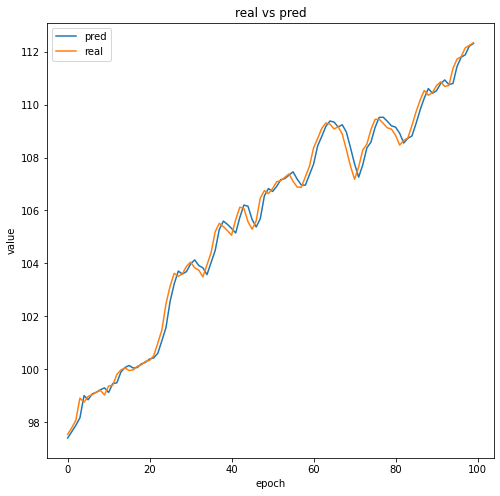

In [66]:
fig_acc = plt.figure(figsize=(8, 8))
plt.plot(y_pred[:100])
plt.plot(y_test[:100])
plt.title('real vs pred')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['pred', 'real'], loc='upper left')
plt.show()

In [33]:
X1, y1 = create_sequences(data. values, seq_length=1)
train_split=0.8
date_index =data. index
split_idx = int(np. ceil(len(X1)*train_split) )
X_train, X_test = X1[ : split_idx], X1[split_idx: ]

y_train, y_test = y1[ : split_idx], y1[split_idx: ]
X_train_date, X_test_date = date_index[ : split_idx], date_index[split_idx:]
print (X1. shape, X_train. shape, X_test. shape, y_test. shape)

(811, 1, 1) (649, 1, 1) (162, 1, 1) (162, 1)


In [129]:
seq_length = 1



n_features = 1
n_seq = 1
seq_length = 1
X_train = X_train.reshape((X_train.shape[0], n_seq, seq_length, n_features))

In [130]:
X_train = X_train.reshape((X_train.shape[0], n_seq, 1, seq_length, n_features))

In [131]:
ConvLSTM = Sequential()
ConvLSTM.add(ConvLSTM2D(filters=32, kernel_size=(1,1), activation='relu', input_shape=(n_seq, 1, seq_length, n_features)))
ConvLSTM.add(Flatten())
ConvLSTM.add(Dense(1))
ConvLSTM.compile(optimizer='adam', loss='mse')



In [152]:

ConvLSTM.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0447
Epoch 2/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0436
Epoch 3/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0499
Epoch 4/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 5/500
21/21 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 6/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0397
Epoch 8/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0402
Epoch 9/500
21/21 [==============================] - 0s 4ms/step - loss: 0.0431
Epoch 10/500
21/21 [==============================] - 0s 4ms/step - loss: 0.0416
Epoch 11/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 12/500
21/21 [==============================] - 0s 3ms/step - loss: 0.0426
Epoch 13/500
21/21 [=================

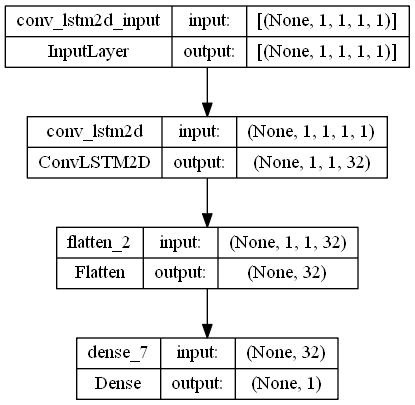

In [36]:

plot_model(ConvLSTM, to_file='convlstm_plot.png', show_shapes=True, show_layer_names=True)

In [153]:
X_test = X_test.reshape((X_test.shape[0], n_seq, 1, seq_length, n_features))

In [154]:
y_pred1 = ConvLSTM.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [155]:
rmse=mean_squared_error(y_test,y_pred1,squared=False)
mape=mean_absolute_percentage_error(y_test,y_pred1)
mae=mean_squared_error(y_test,y_pred1)
print("RSME: " ,rmse)
print("MAPE: ", mape)
print("MAE: ", mae)


RSME:  0.44792574690020037
MAPE:  0.002839518521586027
MAE:  0.20063747473610238


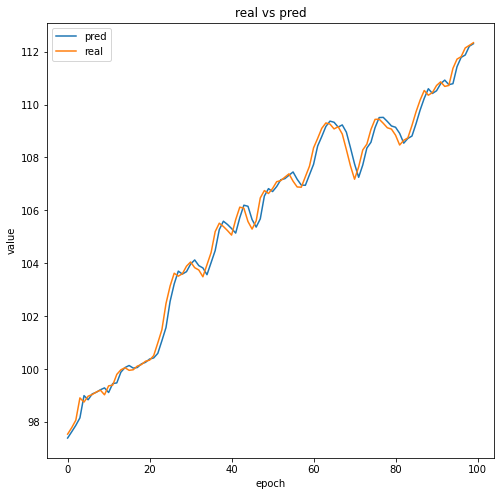

In [157]:
fig_acc = plt.figure(figsize=(8, 8))
plt.plot(y_pred1[:100])
plt.plot(y_test[:100])
plt.title('real vs pred')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['pred', 'real'], loc='upper left')
plt.show()

In [34]:
X1, y1 = create_sequences(data. values, seq_length=1)
train_split=0.8
date_index =data. index
split_idx = int(np. ceil(len(X1)*train_split) )
X_train, X_test = X1[ : split_idx], X1[split_idx: ]

y_train, y_test = y1[ : split_idx], y1[split_idx: ]
X_train_date, X_test_date = date_index[ : split_idx], date_index[split_idx:]
print (X1. shape, X_train. shape, X_test. shape, y_test. shape)

(811, 1, 1) (649, 1, 1) (162, 1, 1) (162, 1)


In [67]:
x_input = datas.values
x_input.shape
#yhat = CNN_LSTM.predict(x_input, verbose=0)
#print(yhat)

(256, 1)

In [68]:
yhat = CNN_LSTM.predict(x_input, verbose=0)
print(yhat)

[[ 15.612233 ]
 [ 16.093948 ]
 [ 16.023933 ]
 [ 15.682692 ]
 [ 15.495334 ]
 [ 15.420474 ]
 [ 15.355138 ]
 [ 15.0781145]
 [ 15.041536 ]
 [ 15.2805395]
 [ 15.20784  ]
 [ 15.334172 ]
 [ 15.069774 ]
 [ 14.970431 ]
 [ 14.83539  ]
 [ 14.933751 ]
 [ 14.8540125]
 [ 14.894241 ]
 [ 15.165313 ]
 [ 15.426433 ]
 [ 15.919471 ]
 [ 16.15075  ]
 [ 16.252642 ]
 [ 16.39058  ]
 [ 16.553244 ]
 [ 16.832691 ]
 [ 16.996246 ]
 [ 17.228777 ]
 [ 17.464842 ]
 [ 17.523241 ]
 [ 17.890556 ]
 [ 18.106123 ]
 [ 18.298023 ]
 [ 18.278059 ]
 [ 18.185818 ]
 [ 17.810177 ]
 [ 17.487692 ]
 [ 17.35917  ]
 [ 17.4981   ]
 [ 17.749487 ]
 [ 18.190922 ]
 [ 18.22782  ]
 [ 18.320454 ]
 [ 18.385845 ]
 [ 18.512476 ]
 [ 18.685263 ]
 [ 18.861698 ]
 [ 18.76779  ]
 [ 18.661055 ]
 [ 18.934065 ]
 [ 19.036446 ]
 [ 19.344383 ]
 [ 19.632528 ]
 [ 19.692745 ]
 [ 20.3038   ]
 [ 20.536985 ]
 [ 20.652752 ]
 [ 20.96683  ]
 [ 20.78967  ]
 [ 20.762445 ]
 [ 20.584726 ]
 [ 20.765305 ]
 [ 21.003767 ]
 [ 21.230642 ]
 [ 21.269382 ]
 [ 22.102604 ]
 [ 22.5116

In [148]:


#ARIMA Model
fit2= CNN_LSTM(data["CPI"], order=(1, 0, 0)).fit(disp=0)
print(fit2.summary())

TypeError: call() got an unexpected keyword argument 'order'